In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from address_extractor import get_detailed_address

In [2]:
rentalhomebd_df=pd.read_csv('nipin_rentalhomebd.csv')

In [3]:
rentalhomebd_df.head()

,title,num_bed,num_bath,area,amenities,location,building_type,purpose,price_in_BDT,details,description,listing_url
0,A FULLY FURNISHED APARTMENT @Gulshan,3 bd,4 ba,2800 sqft,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,210000/mo,"Property Condition: New,,Available For: Fami...",The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-fully...
1,A furnished apartment of 3800 SQFT @Gulshan,3 bd,3 ba,3800 sqft,"Intercom,Electricity,Safety Grill,Govt. Gas,Ho...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,190000/mo,"Property Condition: New,,Available For: Fami...",The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-furni...
2,A furnished apartment of 2300SQFT @Gulshan area,3 bd,3 ba,2300 sqft,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,170000/mo,"Property Condition: New,,Available For: Fami...",A 2300 SQFT nicely viewed apartment at Gulshan...,http://www.rentalhomebd.com/properties/a-furni...
3,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,3 bd,3 ba,2500 sqft,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-2, Dhaka",Apartment/Flats,Rent,200000/mo,"Property Condition: New,,Available For: Fami...",A furnished apartment at Gulshan is now availa...,http://www.rentalhomebd.com/properties/2500-sq...
4,An unfurnished 2165 SQFT apartment up for rent...,3 bd,3 ba,2165 sqft,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,140000/mo,"Property Condition: New,,Available For: Fami...",An unfurnished apartment of 2165 SQFT is now u...,http://www.rentalhomebd.com/properties/an-unfu...


In [4]:
rentalhomebd_df.shape

(441, 12)

In [5]:
rentalhomebd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          441 non-null    object
 1   num_bed        441 non-null    object
 2   num_bath       441 non-null    object
 3   area           441 non-null    object
 4   amenities      440 non-null    object
 5   location       441 non-null    object
 6   building_type  441 non-null    object
 7   purpose        441 non-null    object
 8   price_in_BDT   441 non-null    object
 9   details        441 non-null    object
 10  description    441 non-null    object
 11  listing_url    441 non-null    object
dtypes: object(12)
memory usage: 41.5+ KB


In [6]:
rentalhomebd_df['purpose'].value_counts()

purpose
Rent    439
Sale      2
Name: count, dtype: int64

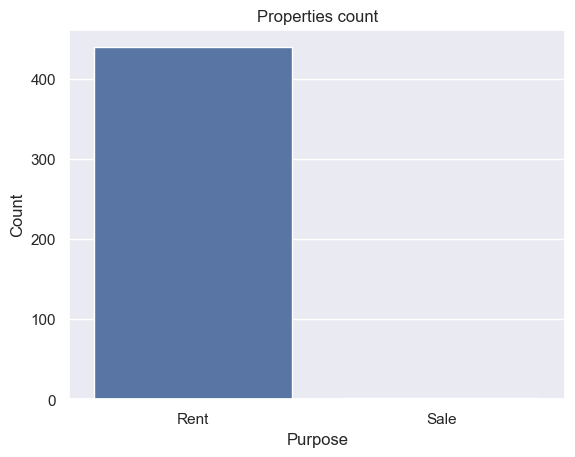

In [7]:
#property_per_purpose.plot(kind="bar")
sns.set()
sns.countplot(x='purpose', data= rentalhomebd_df)
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.title("Properties count");

In [8]:
rentalhomebd_df['building_type'].value_counts()

building_type
Apartment/Flats                 378
Office space                     52
Duplex Home                       7
Showroom / Shop / Restaurant      2
Independent House                 2
Name: count, dtype: int64

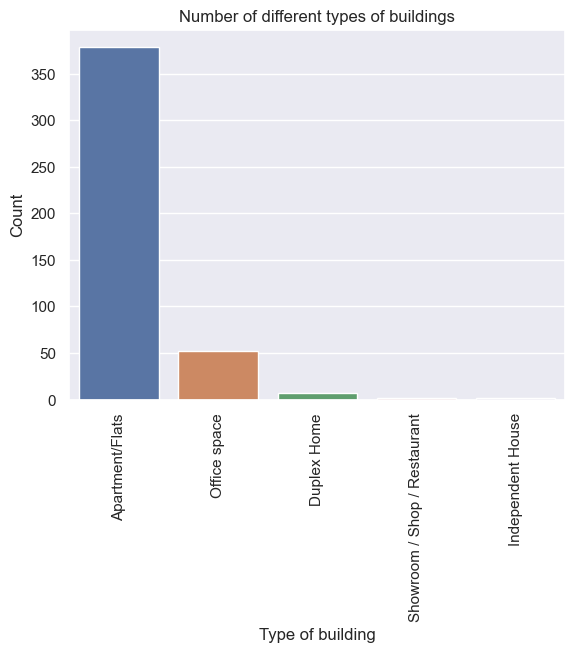

In [9]:
sns.countplot(x='building_type', data= rentalhomebd_df)
plt.xlabel("Type of building")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Number of different types of buildings");

In [10]:
rentalhomebd_df["area"].dtype

dtype('O')

In [11]:
rentalhomebd_df['area'].str.contains('sqft').sum()

441

In [12]:
rentalhomebd_df['area'] = rentalhomebd_df['area'].str.rstrip('sqft')

In [13]:
rentalhomebd_df['area'].str.contains('sqft').sum()

0

In [14]:
rentalhomebd_df.head().T

,0,1,2,3,4
title,A FULLY FURNISHED APARTMENT @Gulshan,A furnished apartment of 3800 SQFT @Gulshan,A furnished apartment of 2300SQFT @Gulshan area,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,An unfurnished 2165 SQFT apartment up for rent...
num_bed,3 bd,3 bd,3 bd,3 bd,3 bd
num_bath,4 ba,3 ba,3 ba,3 ba,3 ba
area,2800,3800,2300,2500,2165
amenities,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,Ho...","Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,El..."
location,"Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-2, Dhaka","Gulshan, Gulshan-1, Dhaka"
building_type,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats
purpose,Rent,Rent,Rent,Rent,Rent
price_in_BDT,210000/mo,190000/mo,170000/mo,200000/mo,140000/mo
details,"Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami..."


In [15]:
rentalhomebd_df["area"] = rentalhomebd_df["area"].astype(float)

In [16]:
rentalhomebd_df['price_in_BDT'].str.contains('/mo').sum()

441

In [17]:
rentalhomebd_df['price_in_BDT'] = rentalhomebd_df['price_in_BDT'].str.rstrip('/mo')

In [18]:
rentalhomebd_df['price_in_BDT'].str.contains('/mo').sum()

0

In [19]:
rentalhomebd_df.rename(columns={"price_in_BDT": "price"}, inplace= True)

In [20]:
rentalhomebd_df["price"] = rentalhomebd_df["price"].astype(float)

In [21]:
rentalhomebd_df.head()

,title,num_bed,num_bath,area,amenities,location,building_type,purpose,price,details,description,listing_url
0,A FULLY FURNISHED APARTMENT @Gulshan,3 bd,4 ba,2800.0,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,210000.0,"Property Condition: New,,Available For: Fami...",The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-fully...
1,A furnished apartment of 3800 SQFT @Gulshan,3 bd,3 ba,3800.0,"Intercom,Electricity,Safety Grill,Govt. Gas,Ho...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,190000.0,"Property Condition: New,,Available For: Fami...",The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-furni...
2,A furnished apartment of 2300SQFT @Gulshan area,3 bd,3 ba,2300.0,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,170000.0,"Property Condition: New,,Available For: Fami...",A 2300 SQFT nicely viewed apartment at Gulshan...,http://www.rentalhomebd.com/properties/a-furni...
3,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,3 bd,3 ba,2500.0,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-2, Dhaka",Apartment/Flats,Rent,200000.0,"Property Condition: New,,Available For: Fami...",A furnished apartment at Gulshan is now availa...,http://www.rentalhomebd.com/properties/2500-sq...
4,An unfurnished 2165 SQFT apartment up for rent...,3 bd,3 ba,2165.0,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Gulshan, Gulshan-1, Dhaka",Apartment/Flats,Rent,140000.0,"Property Condition: New,,Available For: Fami...",An unfurnished apartment of 2165 SQFT is now u...,http://www.rentalhomebd.com/properties/an-unfu...


In [22]:
rentalhomebd_df['amenities'] = rentalhomebd_df['amenities'].astype(str)

In [23]:
amenities_set = set()
for amenities in rentalhomebd_df['amenities']:
    amenities_set.update(amenities.split(','))


In [24]:
amenities_df = pd.DataFrame({'amenities': list(amenities_set)})

In [25]:
amenities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   amenities  24 non-null     object
dtypes: object(1)
memory usage: 320.0+ bytes


In [26]:
amenities_df.head(24)

,amenities
0,Wi-Fi
1,Landscape Garden
2,WASA
3,Internet
4,Emergency Exit
5,Electricity
6,Child Allowed
7,Gymnasium
8,Community Center
9,Elevator


In [27]:
for amenity in amenities_set:
    rentalhomebd_df[f"{amenity.strip()}-amenity"] = rentalhomebd_df['amenities'].str.contains(amenity).map({True: 'Yes', False: 'No'})

In [28]:
rentalhomebd_df.head().T

,0,1,2,3,4
title,A FULLY FURNISHED APARTMENT @Gulshan,A furnished apartment of 3800 SQFT @Gulshan,A furnished apartment of 2300SQFT @Gulshan area,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,An unfurnished 2165 SQFT apartment up for rent...
num_bed,3 bd,3 bd,3 bd,3 bd,3 bd
num_bath,4 ba,3 ba,3 ba,3 ba,3 ba
area,2800.0,3800.0,2300.0,2500.0,2165.0
amenities,"Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,Ho...","Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,El...","Intercom,Electricity,Safety Grill,Govt. Gas,El..."
location,"Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-2, Dhaka","Gulshan, Gulshan-1, Dhaka"
building_type,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats
purpose,Rent,Rent,Rent,Rent,Rent
price,210000.0,190000.0,170000.0,200000.0,140000.0
details,"Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami..."


In [29]:
rentalhomebd_df= rentalhomebd_df.drop(["amenities", "nan-amenity"], axis=1)

In [30]:
rentalhomebd_df.head().T

,0,1,2,3,4
title,A FULLY FURNISHED APARTMENT @Gulshan,A furnished apartment of 3800 SQFT @Gulshan,A furnished apartment of 2300SQFT @Gulshan area,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,An unfurnished 2165 SQFT apartment up for rent...
num_bed,3 bd,3 bd,3 bd,3 bd,3 bd
num_bath,4 ba,3 ba,3 ba,3 ba,3 ba
area,2800.0,3800.0,2300.0,2500.0,2165.0
location,"Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-2, Dhaka","Gulshan, Gulshan-1, Dhaka"
building_type,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats
purpose,Rent,Rent,Rent,Rent,Rent
price,210000.0,190000.0,170000.0,200000.0,140000.0
details,"Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami..."
description,The furnished apartment is now up for rent tha...,The furnished apartment is now up for rent tha...,A 2300 SQFT nicely viewed apartment at Gulshan...,A furnished apartment at Gulshan is now availa...,An unfurnished apartment of 2165 SQFT is now u...


In [31]:
for i in range(len(rentalhomebd_df)):
    if rentalhomebd_df.loc[i, 'building_type'] in ['Apartment/Flats', 'Duplex Home', 'Independent House']:
        rentalhomebd_df.loc[i, 'building_nature'] = 'Residential'
    elif rentalhomebd_df.loc[i, 'building_type'] in ['Office space', 'Showroom / Shop / Restaurant']:
        rentalhomebd_df.loc[i, 'building_nature'] = 'Commercial'

In [32]:
rentalhomebd_df['building_nature'].value_counts()

building_nature
Residential    387
Commercial      54
Name: count, dtype: int64

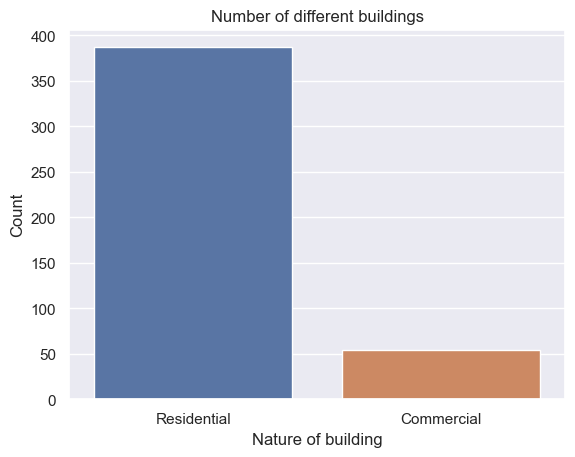

In [33]:
sns.countplot(x='building_nature', data= rentalhomebd_df)
plt.xlabel("Nature of building")
plt.ylabel("Count")
plt.title("Number of different buildings");

In [34]:
address_df = rentalhomebd_df['location'].apply(get_detailed_address).apply(pd.Series)

In [35]:
address_df.head()

,city,locality,address
0,Dhaka,Gulshan,Gulshan-1
1,Dhaka,Gulshan,Gulshan-1
2,Dhaka,Gulshan,Gulshan-1
3,Dhaka,Gulshan,Gulshan-2
4,Dhaka,Gulshan,Gulshan-1


In [36]:
rentalhomebd_df = pd.concat([rentalhomebd_df, address_df], axis=1)

In [37]:
rentalhomebd_df.shape

(441, 38)

In [38]:
rentalhomebd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          441 non-null    object 
 1   num_bed                        441 non-null    object 
 2   num_bath                       441 non-null    object 
 3   area                           441 non-null    float64
 4   location                       441 non-null    object 
 5   building_type                  441 non-null    object 
 6   purpose                        441 non-null    object 
 7   price                          441 non-null    float64
 8   details                        441 non-null    object 
 9   description                    441 non-null    object 
 10  listing_url                    441 non-null    object 
 11  Wi-Fi-amenity                  441 non-null    object 
 12  Landscape Garden-amenity       441 non-null    obj

In [39]:
rentalhomebd_df.head().T

,0,1,2,3,4
title,A FULLY FURNISHED APARTMENT @Gulshan,A furnished apartment of 3800 SQFT @Gulshan,A furnished apartment of 2300SQFT @Gulshan area,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,An unfurnished 2165 SQFT apartment up for rent...
num_bed,3 bd,3 bd,3 bd,3 bd,3 bd
num_bath,4 ba,3 ba,3 ba,3 ba,3 ba
area,2800.0,3800.0,2300.0,2500.0,2165.0
location,"Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-2, Dhaka","Gulshan, Gulshan-1, Dhaka"
building_type,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats
purpose,Rent,Rent,Rent,Rent,Rent
price,210000.0,190000.0,170000.0,200000.0,140000.0
details,"Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami...","Property Condition: New,,Available For: Fami..."
description,The furnished apartment is now up for rent tha...,The furnished apartment is now up for rent tha...,A 2300 SQFT nicely viewed apartment at Gulshan...,A furnished apartment at Gulshan is now availa...,An unfurnished apartment of 2165 SQFT is now u...


In [40]:
##details column also contain features of properties, so separating the features into different columns
# Replace double commas with single comma and remove last comma in each row
rentalhomebd_df['details'] = rentalhomebd_df['details'].str.replace(',,', ',').str.strip(',')
# Create a list of all unique parameter names in the details column
params = set(param.split(':')[0].strip().lower() for detail in rentalhomebd_df['details'] for param in detail.split(','))
# Create new columns for each parameter
for param in params:
#    rentalhomebd_df[param] = None
    rentalhomebd_df[f"{param}-amenity"] = None    

# Iterate over each row and extract values for each parameter
for i, detail in enumerate(rentalhomebd_df['details']):
    params_values = detail.split(',')
    for param_value in params_values:
        param, value = param_value.split(':')
        param = param.strip().lower() + "-amenity"
        value = value.strip().lower()
        rentalhomebd_df.at[i, param] = value

In [41]:
rentalhomebd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          441 non-null    object 
 1   num_bed                        441 non-null    object 
 2   num_bath                       441 non-null    object 
 3   area                           441 non-null    float64
 4   location                       441 non-null    object 
 5   building_type                  441 non-null    object 
 6   purpose                        441 non-null    object 
 7   price                          441 non-null    float64
 8   details                        441 non-null    object 
 9   description                    441 non-null    object 
 10  listing_url                    441 non-null    object 
 11  Wi-Fi-amenity                  441 non-null    object 
 12  Landscape Garden-amenity       441 non-null    obj

In [42]:
rentalhomebd_df.head().T

,0,1,2,3,4
title,A FULLY FURNISHED APARTMENT @Gulshan,A furnished apartment of 3800 SQFT @Gulshan,A furnished apartment of 2300SQFT @Gulshan area,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,An unfurnished 2165 SQFT apartment up for rent...
num_bed,3 bd,3 bd,3 bd,3 bd,3 bd
num_bath,4 ba,3 ba,3 ba,3 ba,3 ba
area,2800.0,3800.0,2300.0,2500.0,2165.0
location,"Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-1, Dhaka","Gulshan, Gulshan-2, Dhaka","Gulshan, Gulshan-1, Dhaka"
building_type,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats,Apartment/Flats
purpose,Rent,Rent,Rent,Rent,Rent
price,210000.0,190000.0,170000.0,200000.0,140000.0
details,"Property Condition: New,Available For: Famil...","Property Condition: New,Available For: Famil...","Property Condition: New,Available For: Famil...","Property Condition: New,Available For: Famil...","Property Condition: New,Available For: Famil..."
description,The furnished apartment is now up for rent tha...,The furnished apartment is now up for rent tha...,A 2300 SQFT nicely viewed apartment at Gulshan...,A furnished apartment at Gulshan is now availa...,An unfurnished apartment of 2165 SQFT is now u...


In [43]:
rentalhomebd_df= rentalhomebd_df.drop(["details",'location'], axis=1)

In [44]:
rentalhomebd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          441 non-null    object 
 1   num_bed                        441 non-null    object 
 2   num_bath                       441 non-null    object 
 3   area                           441 non-null    float64
 4   building_type                  441 non-null    object 
 5   purpose                        441 non-null    object 
 6   price                          441 non-null    float64
 7   description                    441 non-null    object 
 8   listing_url                    441 non-null    object 
 9   Wi-Fi-amenity                  441 non-null    object 
 10  Landscape Garden-amenity       441 non-null    object 
 11  WASA-amenity                   441 non-null    object 
 12  Internet-amenity               441 non-null    obj

In [45]:
# renaming the columns according to bproperty and also changing the column name strcuture of other columns
rentalhomebd_df.rename(columns={'num_bath': 'num_bath_rooms', 'num_bed': 'num_bed_rooms', 'description': 'property_description', 
 'listing_url': 'property_url', 'balcony-amenity': 'balcony-or-terrace-amenity','car parking-amenity':'parking-spaces-amenity','servent room-amenity': 'servant-room-amenity','Elevator-amenity':'elevators-in-building-amenity', 
 'CCTV-amenity':'cctv-security-amenity', 'Intercom-amenity':'intercom-amenity', 'Swimming Pool-amenity': 'swimming-pool-amenity', 
 'Security Guard-amenity': 'security-guard-amenity','Govt. Gas-amenity': 'govt-gas-amenity', 'Emergency Exit-amenity':
 'emergency-exit-amenity', 'Hot Water-amenity': 'hot-water-amenity', 'Landscape Garden-amenity': 'landscape-garden-amenity',
 'Child Allowed-amenity'  : 'child-allowed-amenity',  "Visitor's Car Parking-amenity": "visitor-car-parking-amenity", 
    'Wi-Fi-amenity': 'wifi-amenity', 'Community Center-amenity': 'community-center-amenity', "Guard's Room-amenity": 
    'guard-room-amenity', 'Driver Room-amenity': 'driver-room-amenity', 'Gymnasium-amenity': 'gymnasium-amenity',
    'WASA-amenity': 'wasa-amenity', 'Internet-amenity':'internet-amenity', 'Electricity-amenity': 'electricity-amenity', 
    'Safety Grill-amenity': 'safety-grill-amenity', 'Fire Alarm-amenity': 'fire-alarm-amenity', 'Rooftop Garden-amenity':
    'rooftop-garden-amenity', 'Pet Allowed-amenity': 'pet-allowed-amenity', 'service charge-amenity': 'service-charge-amenity', 
        'staff toilet-amenity': 'staff-toilet-amenity' , 'property condition-amenity': 'property-condition-amenity', 
    'drawing room-amenity': 'drawing-room-amenity', 'furnished status-amenity': 'furnished-status-amenity', 
    'nagotiable-amenity':'negotiable-amenity', 'available for-amenity': 'available-for-amenity', 
    'advance deposit-amenity': 'advance-deposit-amenity', 'living room-amenity': 'living-room-amenity', 
        'dining room-amenity': 'dining-room-amenity', 'floor type-amenity': 'floor-type-amenity'}, inplace=True)

In [46]:
rentalhomebd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          441 non-null    object 
 1   num_bed_rooms                  441 non-null    object 
 2   num_bath_rooms                 441 non-null    object 
 3   area                           441 non-null    float64
 4   building_type                  441 non-null    object 
 5   purpose                        441 non-null    object 
 6   price                          441 non-null    float64
 7   property_description           441 non-null    object 
 8   property_url                   441 non-null    object 
 9   wifi-amenity                   441 non-null    object 
 10  landscape-garden-amenity       441 non-null    object 
 11  wasa-amenity                   441 non-null    object 
 12  internet-amenity               441 non-null    obj

In [47]:
## saving the cleaned file
rentalhomebd_df.to_csv('cleaned_rentalhomebd.csv', index=False)

In [48]:
##loading the cleaned file
cleaned_file=pd.read_csv('cleaned_rentalhomebd.csv')
cleaned_file.head()

,title,num_bed_rooms,num_bath_rooms,area,building_type,purpose,price,property_description,property_url,wifi-amenity,...,floor-type-amenity,dining-room-amenity,kitchen-amenity,negotiable-amenity,parking-spaces-amenity,service-charge-amenity,staff-toilet-amenity,balcony-or-terrace-amenity,property-condition-amenity,living-room-amenity
0,A FULLY FURNISHED APARTMENT @Gulshan,3 bd,4 ba,2800.0,Apartment/Flats,Rent,210000.0,The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-fully...,No,...,NaN,yes,1.0,yes,available,12000.0,NaN,NaN,new,yes
1,A furnished apartment of 3800 SQFT @Gulshan,3 bd,3 ba,3800.0,Apartment/Flats,Rent,190000.0,The furnished apartment is now up for rent tha...,http://www.rentalhomebd.com/properties/a-furni...,No,...,NaN,yes,1.0,yes,available,NaN,NaN,NaN,new,yes
2,A furnished apartment of 2300SQFT @Gulshan area,3 bd,3 ba,2300.0,Apartment/Flats,Rent,170000.0,A 2300 SQFT nicely viewed apartment at Gulshan...,http://www.rentalhomebd.com/properties/a-furni...,No,...,NaN,yes,1.0,yes,available,10000.0,NaN,NaN,new,yes
3,2500 SQFT FURNISHED APARTMENT @GULSHAN-2,3 bd,3 ba,2500.0,Apartment/Flats,Rent,200000.0,A furnished apartment at Gulshan is now availa...,http://www.rentalhomebd.com/properties/2500-sq...,No,...,NaN,yes,1.0,yes,available,10000.0,NaN,NaN,new,yes
4,An unfurnished 2165 SQFT apartment up for rent...,3 bd,3 ba,2165.0,Apartment/Flats,Rent,140000.0,An unfurnished apartment of 2165 SQFT is now u...,http://www.rentalhomebd.com/properties/an-unfu...,No,...,NaN,yes,1.0,yes,available,8000.0,NaN,NaN,new,yes
